In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/System-Threat-Forecaster/sample_submission.csv
/kaggle/input/System-Threat-Forecaster/train.csv
/kaggle/input/System-Threat-Forecaster/test.csv


# **Importing Of train and test data.**

In [2]:
df_train = pd.read_csv('/kaggle/input/System-Threat-Forecaster/train.csv',index_col=['MachineID'])

In [3]:
df_test = pd.read_csv('/kaggle/input/System-Threat-Forecaster/test.csv',index_col=['MachineID'])

# **Exploratory Data Analysis, Feature Engineering and Data Preprocesssing**

In [4]:
df_train.shape

(100000, 75)

In [5]:
df_test.shape

(10000, 74)

In [6]:
df_test.head()

,ProductName,EngineVersion,AppVersion,SignatureVersion,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,NumAntivirusProductsEnabled,...,FirmwareVersionID,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,DateAS,DateOS
MachineID,,,,,,,,,,,,,,,,,,,,,
c2c61173092ad20db5585ca8c10de6e0,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1276.0,0,7.0,0,53447.0,1.0,1.0,...,48751.0,0,0.0,0,0,0.0,1.0,11.0,2018-08-12 13:12:00,2018-07-10
2e6bb5362ba1ce897feeb1de5edea686,win8defender,1.1.15100.1,4.10.209.0,1.273.371.0,0,7.0,0,46184.0,2.0,2.0,...,64709.0,1,0.0,0,0,0.0,0.0,12.0,2018-07-26 06:54:00,2016-10-11
692649baed1c50bb8d051ae7f06e3625,win8defender,1.1.15200.1,4.18.1807.18075,1.275.263.0,0,7.0,0,51954.0,2.0,1.0,...,33094.0,1,0.0,0,0,0.0,0.0,10.0,2018-08-27 17:29:00,2018-05-08
2ff95e7d97e9f80ec81c97622dd93ed6,win8defender,1.1.15300.6,4.18.1807.18075,1.277.58.0,0,7.0,0,41571.0,2.0,1.0,...,26184.0,1,0.0,0,0,0.0,0.0,10.0,2018-09-25 22:13:00,2018-05-08
256766b4c5011e146f05b323863e08a4,win8defender,1.1.14800.3,4.14.17639.18041,1.267.898.0,0,7.0,0,40645.0,3.0,1.0,...,12126.0,0,0.0,0,0,0.0,0.0,7.0,2018-05-06 01:31:00,2018-06-12


In [7]:
df_train.head()

,ProductName,EngineVersion,AppVersion,SignatureVersion,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,NumAntivirusProductsEnabled,...,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,DateAS,DateOS,target
MachineID,,,,,,,,,,,,,,,,,,,,,
f541bae429089117c4aac39c90dd3416,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1003.0,0,7.0,0,53447.0,1.0,1.0,...,0,0.0,1,0,1.0,0.0,6.0,2018-09-10 10:11:00,2018-04-17,0
dc2b14d9ce3a0ce4050bb640190f2ca5,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1465.0,0,7.0,0,53447.0,1.0,1.0,...,1,0.0,0,0,0.0,0.0,10.0,2018-08-16 00:01:00,2018-08-14,1
fd20c5f010e9c5f91ad1c6b3e0da68a0,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1546.0,0,7.0,0,53447.0,1.0,1.0,...,0,0.0,0,0,0.0,1.0,6.0,2018-09-20 23:20:00,2018-09-11,1
38711eae85eb77a72ec5dfdf27eb2a76,win8defender,1.1.15200.1,4.12.17007.18011,1.275.1141.0,0,7.0,0,46413.0,2.0,1.0,...,1,0.0,0,0,0.0,0.0,12.0,2018-09-14 00:32:00,2018-01-03,1
32607c9a543a9214e2c7e45800ed4849,win8defender,1.1.15200.1,4.13.17134.228,1.275.1283.0,0,7.0,0,40466.0,2.0,1.0,...,0,0.0,0,0,0.0,1.0,7.0,2018-09-15 19:34:00,2018-09-11,0


In [8]:
df_train.columns

Index(['ProductName', 'EngineVersion', 'AppVersion', 'SignatureVersion',
       'IsBetaUser', 'RealTimeProtectionState', 'IsPassiveModeEnabled',
       'AntivirusConfigID', 'NumAntivirusProductsInstalled',
       'NumAntivirusProductsEnabled', 'HasTpm', 'CountryID', 'CityID',
       'GeoRegionID', 'LocaleEnglishNameID', 'PlatformType', 'Processor',
       'OSVersion', 'OSBuildNumber', 'OSProductSuite', 'OsPlatformSubRelease',
       'OSBuildLab', 'SKUEditionName', 'IsSystemProtected',
       'AutoSampleSubmissionEnabled', 'SMode', 'IEVersionID',
       'FirewallEnabled', 'EnableLUA', 'MDC2FormFactor', 'DeviceFamily',
       'OEMNameID', 'OEMModelID', 'ProcessorCoreCount',
       'ProcessorManufacturerID', 'ProcessorModelID', 'PrimaryDiskCapacityMB',
       'PrimaryDiskType', 'SystemVolumeCapacityMB', 'HasOpticalDiskDrive',
       'TotalPhysicalRAMMB', 'ChassisType', 'PrimaryDisplayDiagonalInches',
       'PrimaryDisplayResolutionHorizontal',
       'PrimaryDisplayResolutionVertical', '

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, f541bae429089117c4aac39c90dd3416 to ad9c385b53f2ca788933a39603b84eda
Data columns (total 75 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   ProductName                         100000 non-null  object 
 1   EngineVersion                       100000 non-null  object 
 2   AppVersion                          100000 non-null  object 
 3   SignatureVersion                    100000 non-null  object 
 4   IsBetaUser                          100000 non-null  int64  
 5   RealTimeProtectionState             99934 non-null   float64
 6   IsPassiveModeEnabled                100000 non-null  int64  
 7   AntivirusConfigID                   99924 non-null   float64
 8   NumAntivirusProductsInstalled       99924 non-null   float64
 9   NumAntivirusProductsEnabled         99924 non-null   float64
 10  HasTpm                              1000

In [10]:
df_train.describe()

,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,NumAntivirusProductsEnabled,HasTpm,CountryID,CityID,GeoRegionID,...,FirmwareManufacturerID,FirmwareVersionID,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,target
count,100000.0,99934.000000,100000.000000,99924.000000,99924.000000,99924.000000,100000.000000,100000.000000,99377.000000,100000.000000,...,99624.000000,99666.000000,100000.000000,99980.000000,100000.000000,100000.000000,99866.000000,99441.000000,99441.000000,100000.000000
mean,0.0,6.848430,0.017620,47975.710440,1.326528,1.018264,0.996780,108.078790,81029.938587,169.741630,...,401.987613,32942.648044,0.495690,0.003841,0.128470,0.040580,0.058398,0.296668,7.875866,0.505250
std,0.0,1.015166,0.131566,13803.321533,0.520681,0.155291,0.056654,63.062151,48944.027074,89.188929,...,221.318891,21151.970827,0.499984,0.061855,0.334614,0.197316,0.234496,0.456791,4.562533,0.499975
min,0.0,0.000000,0.000000,39.000000,1.000000,0.000000,0.000000,1.000000,7.000000,1.000000,...,2.000000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.0,7.000000,0.000000,49480.000000,1.000000,1.000000,1.000000,51.000000,36694.000000,89.000000,...,142.000000,13020.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
50%,0.0,7.000000,0.000000,53447.000000,1.000000,1.000000,1.000000,97.000000,82373.000000,181.000000,...,500.000000,33066.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000
75%,0.0,7.000000,0.000000,53447.000000,2.000000,1.000000,1.000000,162.000000,122835.000000,267.000000,...,556.000000,52357.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,1.000000
max,0.0,8.000000,1.000000,70490.000000,5.000000,4.000000,1.000000,222.000000,167957.000000,296.000000,...,1083.000000,72091.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000,1.000000


In [11]:
num_col = df_train.select_dtypes(include=['int64', 'float64']).columns

cat_col = df_train.select_dtypes(include=['object']).columns

print(f"Number of numerical columns: {len(num_col)}")
print(f"Number of categorical columns: {len(cat_col)}")

Number of numerical columns: 48
Number of categorical columns: 27


In [12]:
df_train[num_col].corr()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,NumAntivirusProductsEnabled,HasTpm,CountryID,CityID,GeoRegionID,...,FirmwareManufacturerID,FirmwareVersionID,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,target
IsBetaUser,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RealTimeProtectionState,NaN,1.000000,-0.901426,0.107907,-0.184396,-0.001299,-0.001035,0.010743,-0.001671,0.013603,...,0.010112,0.008421,-0.015123,0.007044,0.009187,0.003635,0.019879,-0.023005,-0.009479,0.049012
IsPassiveModeEnabled,NaN,-0.901426,1.000000,-0.111384,0.195344,0.023414,0.004929,-0.010327,-0.001968,-0.013213,...,-0.009343,-0.008979,0.017269,-0.007088,-0.005307,-0.000579,-0.016466,0.025863,0.007966,-0.041997
AntivirusConfigID,NaN,0.107907,-0.111384,1.000000,-0.647222,-0.115021,0.059230,0.008457,-0.000666,0.017477,...,-0.009623,-0.020802,-0.044251,0.023157,0.034506,0.033627,0.060264,-0.026385,-0.008294,0.118304
NumAntivirusProductsInstalled,NaN,-0.184396,0.195344,-0.647222,1.000000,0.273791,0.010237,-0.017957,0.003512,-0.042795,...,0.054231,0.047223,0.210308,-0.035076,-0.011100,-0.029814,-0.075055,0.008620,0.028845,-0.151375
NumAntivirusProductsEnabled,NaN,-0.001299,0.023414,-0.115021,0.273791,1.000000,-0.020977,-0.014795,0.006448,-0.022393,...,0.015469,0.003158,0.037019,-0.009299,0.000088,-0.005245,-0.018295,-0.009562,0.000937,-0.041547
HasTpm,NaN,-0.001035,0.004929,0.059230,0.010237,-0.020977,1.000000,0.007648,-0.005940,0.005161,...,-0.004301,-0.001458,0.035167,0.000676,0.011799,0.009900,0.013294,0.028136,-0.003924,0.007658
CountryID,NaN,0.010743,-0.010327,0.008457,-0.017957,-0.014795,0.007648,1.000000,-0.000624,0.597061,...,-0.018788,0.021881,-0.013022,-0.005375,0.004135,-0.008432,-0.008681,0.017307,-0.117528,0.004616
CityID,NaN,-0.001671,-0.001968,-0.000666,0.003512,0.006448,-0.005940,-0.000624,1.000000,-0.060922,...,-0.025710,0.019929,0.010010,-0.001436,-0.015534,-0.000909,-0.003993,0.004718,-0.052817,-0.004596
GeoRegionID,NaN,0.013603,-0.013213,0.017477,-0.042795,-0.022393,0.005161,0.597061,-0.060922,1.000000,...,-0.003138,0.004449,-0.067412,0.010703,0.023614,-0.002761,-0.009481,-0.002651,-0.022153,0.002802


In [13]:
duplicates = df_train.duplicated().sum()
print(f"No. of duplicate values in the data are: {duplicates}")

No. of duplicate values in the data are: 167


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


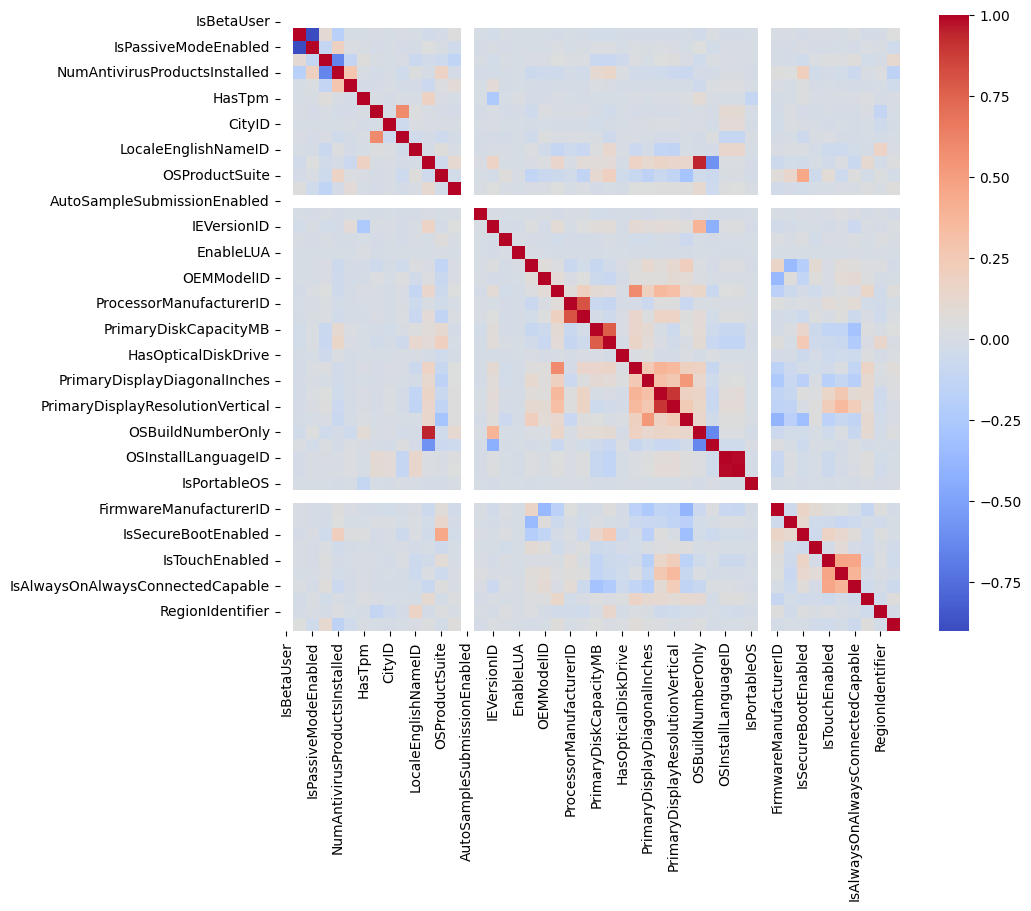

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
corr = df_train[num_col].corr()
sns.heatmap(corr, cmap='coolwarm')
plt.show()

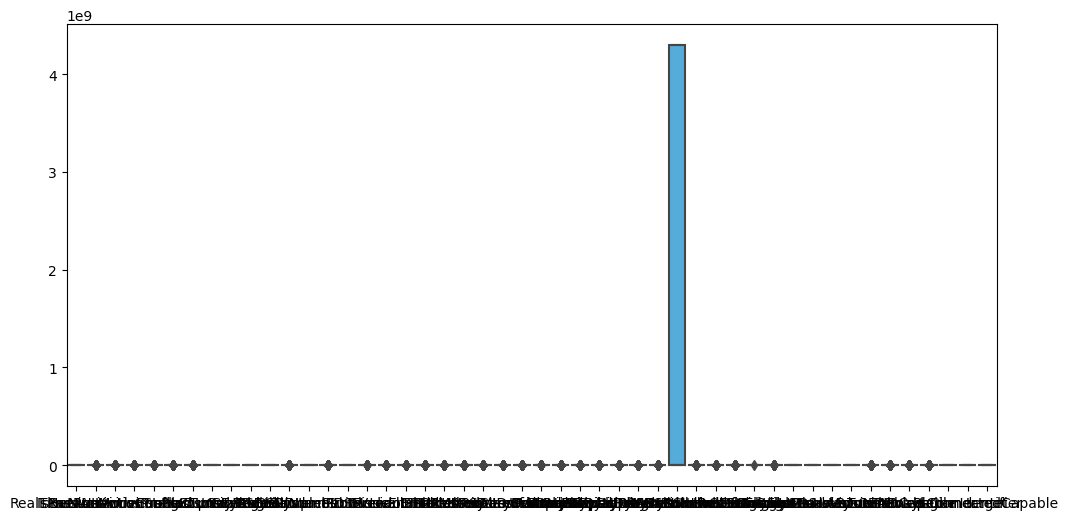

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_train.select_dtypes(include=['int64', 'float64']))
plt.show()

The above boxplot enumerates the only really high outlier presence is in the column "InternalBatteryNumberOfCharges"

In [16]:
df_train['IsBetaUser'].value_counts()

IsBetaUser
0    100000
Name: count, dtype: int64

In [17]:
df_train['ProductName'].value_counts()

ProductName
win8defender    99771
mse               229
Name: count, dtype: int64

<Axes: ylabel='count'>

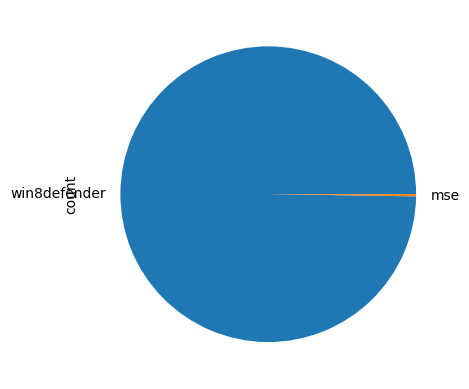

In [18]:
df_train['ProductName'].value_counts().plot(kind='pie')

Pie chart shows that a very small number of people use mse over win8defender.

In [19]:
df_train['RegionIdentifier'].value_counts()

RegionIdentifier
10.0    20628
11.0    15507
3.0     15090
1.0     14253
15.0    11930
7.0      6733
8.0      3298
13.0     2513
5.0      2332
12.0     1858
6.0      1847
4.0      1608
2.0       938
9.0       872
14.0       34
Name: count, dtype: int64

<Axes: xlabel='RegionIdentifier'>

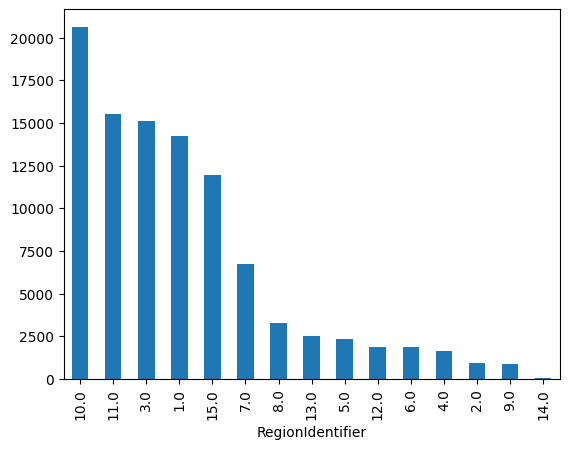

In [20]:
df_train['RegionIdentifier'].value_counts().plot(kind='bar')

From the above cell we can see that most of the users are from region 10.0, more that 20k

In [21]:
df_train.isnull().sum()

ProductName           0
EngineVersion         0
AppVersion            0
SignatureVersion      0
IsBetaUser            0
                   ... 
IsGamer             559
RegionIdentifier    559
DateAS                0
DateOS               24
target                0
Length: 75, dtype: int64

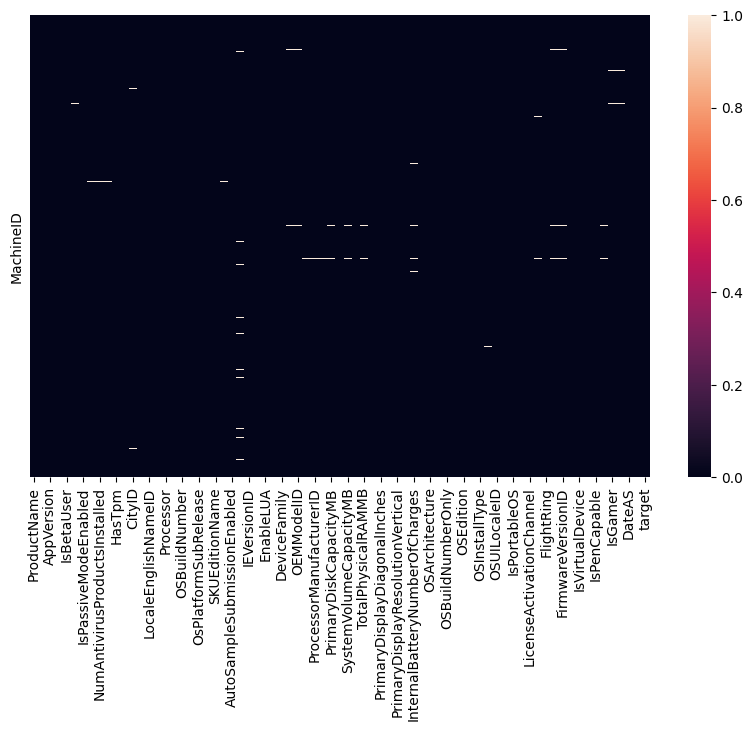

In [22]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_train.isnull(), yticklabels=False)
plt.show()

In [23]:
df_train['DateAS'].value_counts()

DateAS
2018-08-15 06:29:00    1274
2018-09-14 00:32:00    1272
2018-07-26 06:54:00    1068
2018-09-04 22:13:00    1045
2018-08-22 05:11:00     997
                       ... 
2017-03-29 21:29:00       1
2018-04-22 00:27:00       1
2017-09-16 13:19:00       1
2018-01-06 13:53:00       1
2017-09-28 08:53:00       1
Name: count, Length: 2695, dtype: int64

In [24]:
pd.to_datetime(df_train['DateAS']).dt.date

MachineID
f541bae429089117c4aac39c90dd3416    2018-09-10
dc2b14d9ce3a0ce4050bb640190f2ca5    2018-08-16
fd20c5f010e9c5f91ad1c6b3e0da68a0    2018-09-20
38711eae85eb77a72ec5dfdf27eb2a76    2018-09-14
32607c9a543a9214e2c7e45800ed4849    2018-09-15
                                       ...    
a378b2196a7a1d8ee0d4f989ee46730e    2018-09-21
7f4433ca05d24b9bbdd3932f8b05e61f    2018-08-10
d6852dfff534e03d5ddfd3c7875ab072    2018-08-26
70a8dc682128c9ff78a3de5aea9dac74    2018-06-04
ad9c385b53f2ca788933a39603b84eda    2018-07-14
Name: DateAS, Length: 100000, dtype: object

to_datetime library helps us to see the the date and time each individual user data ws taken.

In [25]:
pd.to_datetime(df_train['DateAS']).dt.time

MachineID
f541bae429089117c4aac39c90dd3416    10:11:00
dc2b14d9ce3a0ce4050bb640190f2ca5    00:01:00
fd20c5f010e9c5f91ad1c6b3e0da68a0    23:20:00
38711eae85eb77a72ec5dfdf27eb2a76    00:32:00
32607c9a543a9214e2c7e45800ed4849    19:34:00
                                      ...   
a378b2196a7a1d8ee0d4f989ee46730e    00:59:00
7f4433ca05d24b9bbdd3932f8b05e61f    07:23:00
d6852dfff534e03d5ddfd3c7875ab072    23:51:00
70a8dc682128c9ff78a3de5aea9dac74    17:13:00
ad9c385b53f2ca788933a39603b84eda    15:36:00
Name: DateAS, Length: 100000, dtype: object

In [26]:
x = df_train.drop("target", axis=1)
y = df_train["target"]

In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split

num_col = x.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_col = x.select_dtypes(include=['object']).columns.tolist()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median', add_indicator=False)),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent', add_indicator=False)),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

col_transformer = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, num_col),
        ('cat', categorical_pipeline, cat_col)
    ],
)

X_train_transformed = col_transformer.fit_transform(x_train)
X_test_transformed = col_transformer.transform(x_test)

In [28]:
X_train_transformed.shape

(80000, 6045)

In [29]:
X_test_transformed.shape

(20000, 6045)

# **MODEL BUILDING**

# Model 1: Logistic Regressor

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model_2 = LogisticRegression(random_state=42, max_iter=1000)

model_2.fit(X_train_transformed, y_train)
y_pred = model_2.predict(X_test_transformed)

accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic regressor accuracy: {accuracy:.4f}")

Logistic regressor accuracy: 0.6082


# Model 2: RandomForest

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model_1 = RandomForestClassifier(n_estimators=50, max_features="sqrt", n_jobs=-1, random_state=42)

model_1.fit(X_train_transformed, y_train)
y_pred = model_1.predict(X_test_transformed)

accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.4f}")

Random Forest Accuracy: 0.6058


# **Model 3: LightGBM**

In [32]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score

model_3 = lgb.LGBMClassifier(random_state=42, n_estimators=75)

model_3.fit(X_train_transformed, y_train)
y_pred = model_3.predict(X_test_transformed)

accuracy = accuracy_score(y_test, y_pred)
print(f"LightGBM Classifier: {accuracy:.4f}")

[LightGBM] [Info] Number of positive: 40403, number of negative: 39597
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.046762 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8012
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 2258
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505038 -> initscore=0.020151
[LightGBM] [Info] Start training from score 0.020151
LightGBM Classifier: 0.6290


# **HyperParameter Tuning on the Best Model**

In [33]:
from sklearn.model_selection import RandomizedSearchCV
import lightgbm as lgb
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

params = {
    'classifier__n_estimators': [100, 150],
    'classifier__learning_rate': [0.1, 0.05],
    'classifier__max_depth': [3, 4],
}

pipeline = Pipeline(steps=[
    ('preprocessor', col_transformer),
    ('classifier', model_3)
])

random_search = RandomizedSearchCV(pipeline, params, n_iter=20, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)

random_search.fit(x_train, y_train)
best_model = random_search.best_estimator_
y_pred = best_model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy with Best Parameters: {test_accuracy:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 8 is smaller than n_iter=20. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[LightGBM] [Info] Number of positive: 40403, number of negative: 39597
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.055391 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8012
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 2258
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505038 -> initscore=0.020151
[LightGBM] [Info] Start training from score 0.020151
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

# **Final Submissions**

In [34]:
final_pipeline = Pipeline(steps=[
    ('preprocessor', col_transformer),
    ('classifier', model_3)
])
final_predictions = final_pipeline.predict(df_test)

In [35]:
submission = pd.DataFrame({
    "id": range(len(df_test)),
    "target": final_predictions
})
submission.to_csv('submission.csv', index=False)